# **CHURN RISK PREDICTION**

### IMPORT LIBRARIES

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### IMPORT TRAINING DATA

In [208]:
df = pd.read_csv("dataset/train.csv")
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [209]:
df.shape

(36992, 25)

In [210]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [211]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [213]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

#### HANDLING NULL VALUES

In [214]:
# filling categorical missing column
df['region_category']= df['region_category'].fillna(df['region_category'].mode()[0])
df['preferred_offer_types']= df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])

In [215]:
# handle numerical missing column
df['points_in_wallet']= df['points_in_wallet'].fillna(df['points_in_wallet'].mean())

In [216]:
df.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [217]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,184.811682,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,624.350000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,686.882199,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,757.002500,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36992 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [219]:
# highly correlated
df[['complaint_status', 'past_complaint']].head()

,complaint_status,past_complaint
0,Not Applicable,No
1,Solved,Yes
2,Solved in Follow-up,Yes
3,Unsolved,Yes
4,Solved,Yes


In [220]:
df.drop('complaint_status', axis=1, inplace=True)

In [221]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'feedback',
       'churn_risk_score'],
      dtype='object')

### HANDLE NUMERICAL COLUMNS

In [222]:
df1 = df[['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']]

In [223]:
df1.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,18,17,300.63,53005.25,781.750000,2
1,32,16,306.34,12838.38,686.882199,1
2,44,14,516.16,21027.00,500.690000,5
3,37,11,53.27,25239.56,567.660000,5
4,31,20,113.13,24483.66,663.060000,5


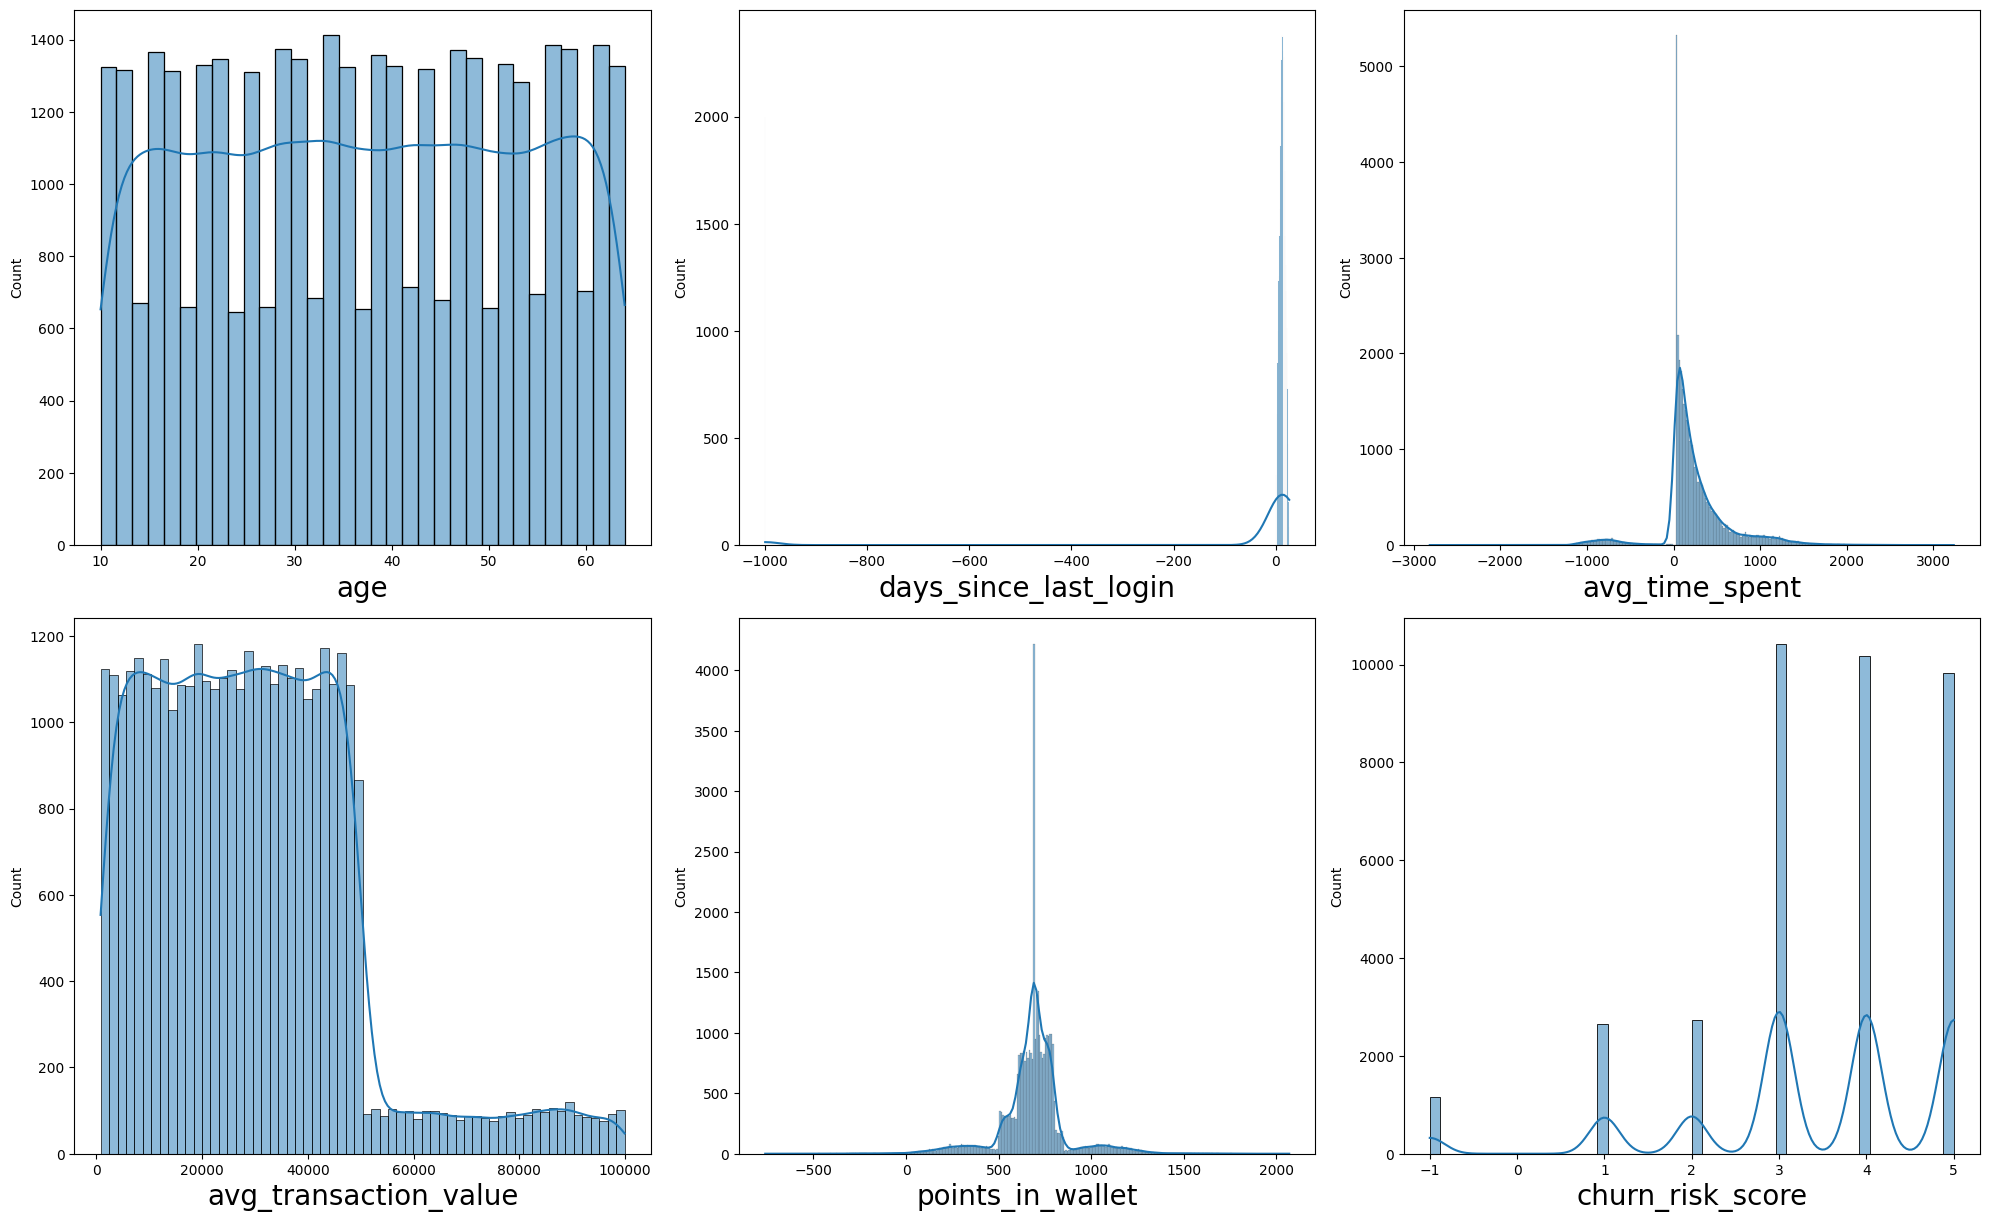

In [224]:
# lets see how data is distributed for every numeric column
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in df1:
    if plotnumber <= 15:
        ax = plt.subplot(5, 3, plotnumber)
        sns.histplot(df1[column], kde=True)
        plt.xlabel(column, fontsize=20)
        
    plotnumber += 1
plt.tight_layout()


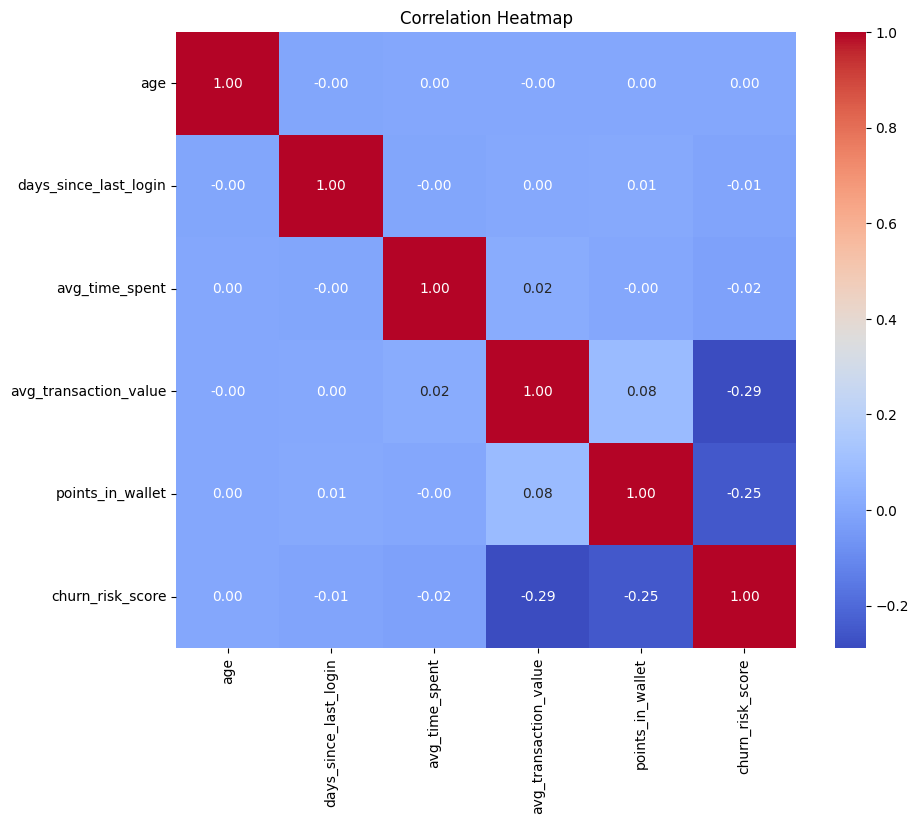

In [225]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

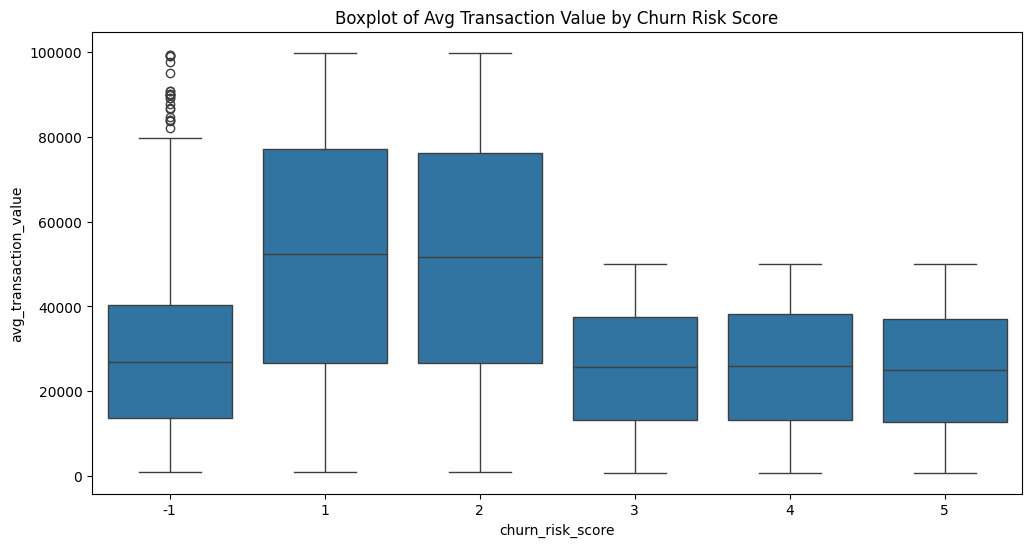

In [226]:
# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='churn_risk_score', y='avg_transaction_value', data=df1)
plt.title('Boxplot of Avg Transaction Value by Churn Risk Score')
plt.show()

In [276]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df1['avg_transaction_value'].quantile(0.25)
Q3 = df1['avg_transaction_value'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_cleaned = df1[(df1['avg_transaction_value'] >= lower_bound) & (df1['avg_transaction_value'] <= upper_bound)]

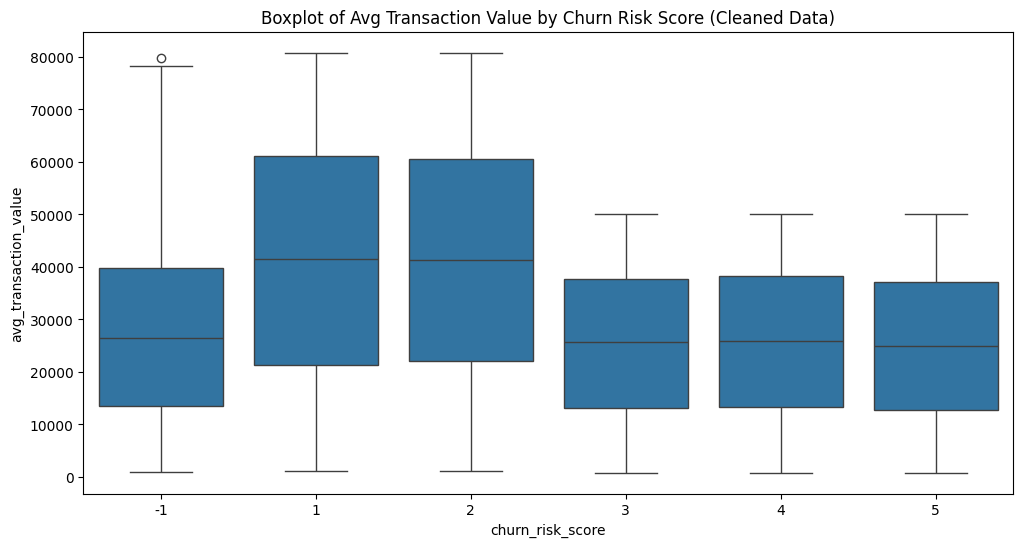

In [277]:
# Plot the cleaned data
plt.figure(figsize=(12, 6))
sns.boxplot(x='churn_risk_score', y='avg_transaction_value', data=df_cleaned)
plt.title('Boxplot of Avg Transaction Value by Churn Risk Score (Cleaned Data)')
plt.show()

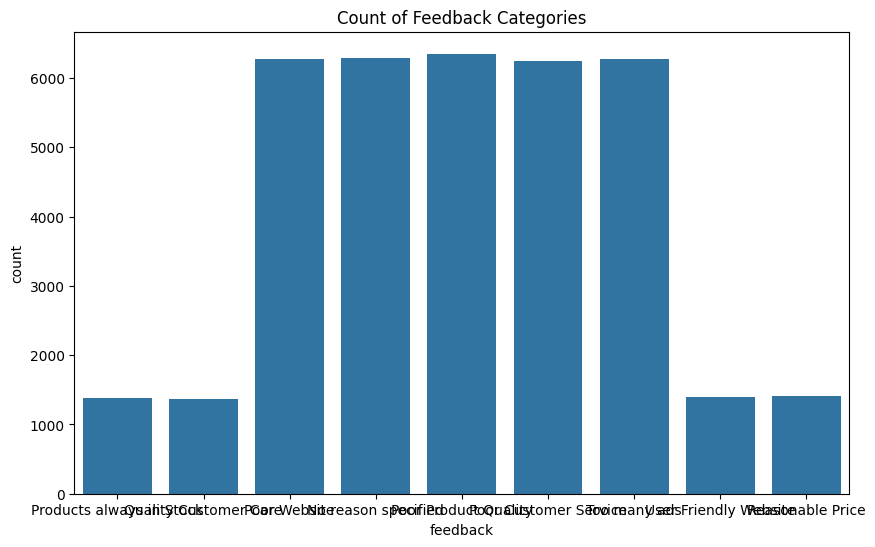

In [227]:
# Countplot for Categorical Columns
plt.figure(figsize=(10, 6))
sns.countplot(x='feedback', data=df)
plt.title('Count of Feedback Categories')
plt.show()

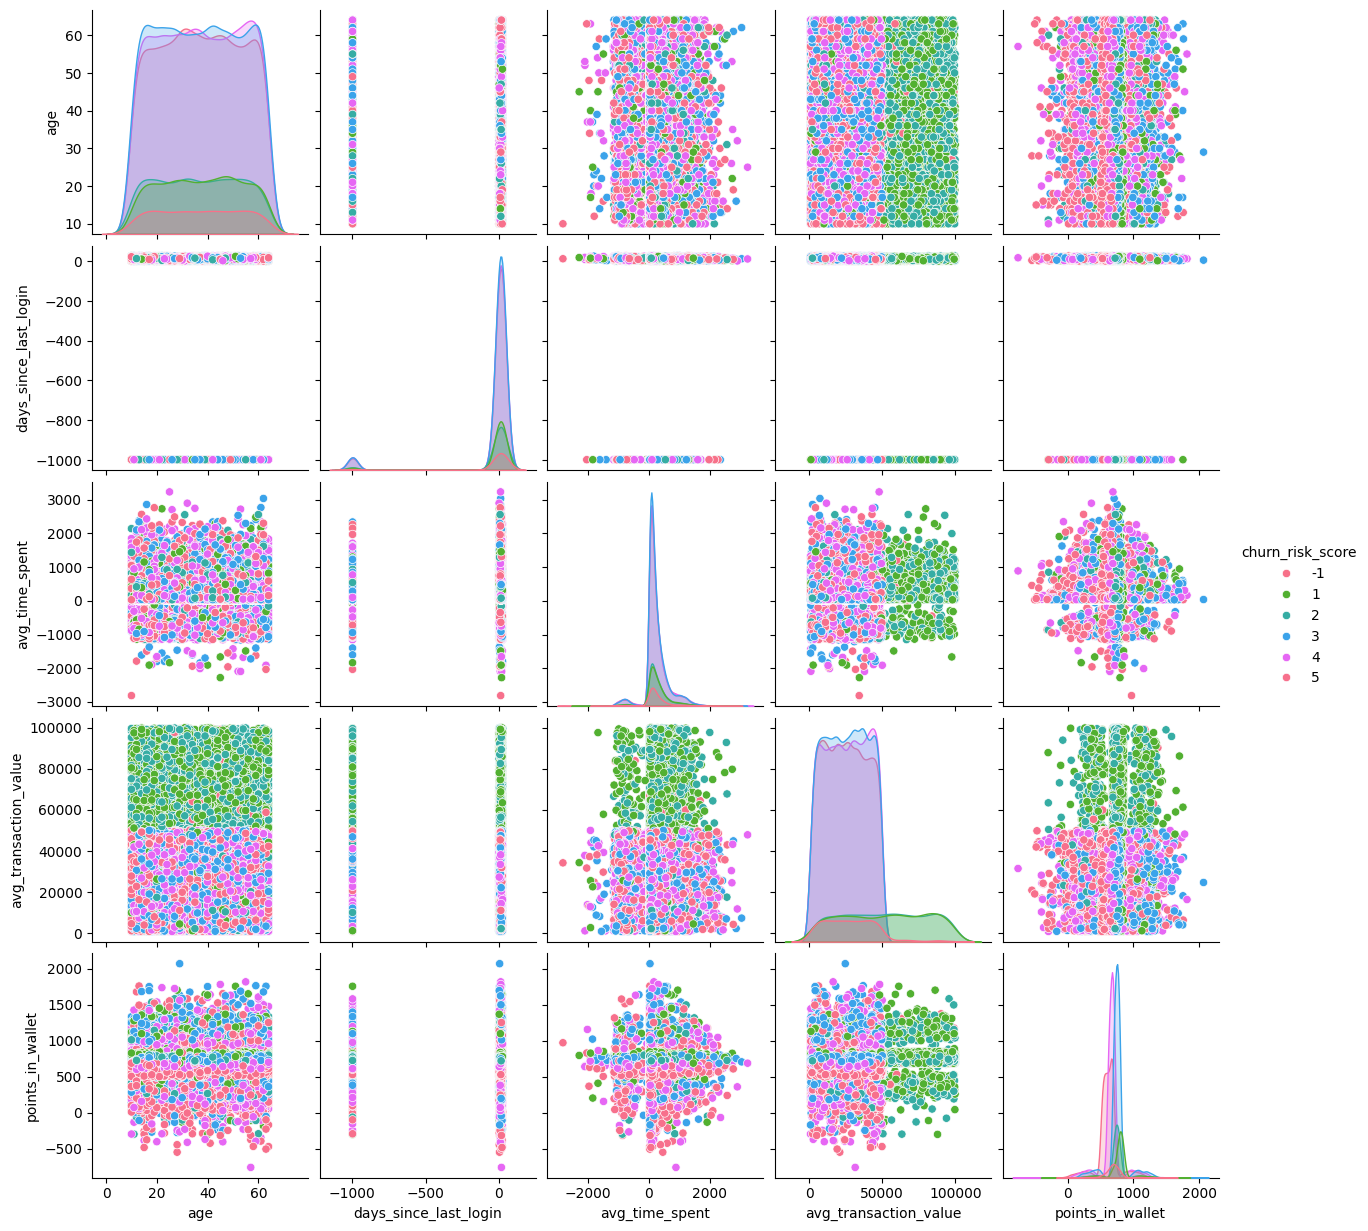

In [228]:
# Pairplot of the Numerical Columns
sns.pairplot(df1, hue='churn_risk_score', palette='husl')
plt.show()

In [229]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,17,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,16,306.34,12838.38,10.0,686.882199,Yes,No,Yes,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,14,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,11,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,20,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Poor Website,5


In [230]:
df[['joining_date']].head()

,joining_date
0,2017-08-17
1,2017-08-28
2,2016-11-11
3,2016-10-29
4,2017-09-12


In [231]:
df['joining_day'] = pd.to_datetime(df.joining_date, format="%Y-%m-%d").dt.day
df['joining_month'] = pd.to_datetime(df.joining_date, format="%Y-%m-%d").dt.month
df['joining_year'] = pd.to_datetime(df.joining_date, format="%Y-%m-%d").dt.year

In [232]:
df[['joining_day', 'joining_month', 'joining_year']].head()

,joining_day,joining_month,joining_year
0,17,8,2017
1,28,8,2017
2,11,11,2016
3,29,10,2016
4,12,9,2017


In [233]:
df.drop(["joining_date"], axis=1, inplace=True)

In [234]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'feedback',
       'churn_risk_score', 'joining_day', 'joining_month', 'joining_year'],
      dtype='object')

In [235]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,17.0,781.750000,Yes,Yes,No,Products always in Stock,2,17,8,2017
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,10.0,686.882199,Yes,No,Yes,Quality Customer Care,1,28,8,2017
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,22.0,500.690000,No,Yes,Yes,Poor Website,5,11,11,2016
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,6.0,567.660000,No,Yes,Yes,Poor Website,5,29,10,2016
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,16.0,663.060000,No,Yes,Yes,Poor Website,5,12,9,2017


In [236]:
df[['last_visit_time']].head()

,last_visit_time
0,16:08:02
1,12:38:13
2,22:53:21
3,15:57:50
4,15:46:44


In [237]:
# Extract hour, minute, and second directly
df['last_visit_time_hour'] = pd.to_datetime(df['last_visit_time']).dt.hour
df['last_visit_time_minutes'] = pd.to_datetime(df['last_visit_time']).dt.minute
df['last_visit_time_seconds'] = pd.to_datetime(df['last_visit_time']).dt.second


C:\Users\TEST\AppData\Local\Temp\ipykernel_11320\3472546530.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_visit_time_hour'] = pd.to_datetime(df['last_visit_time']).dt.hour
C:\Users\TEST\AppData\Local\Temp\ipykernel_11320\3472546530.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_visit_time_minutes'] = pd.to_datetime(df['last_visit_time']).dt.minute
C:\Users\TEST\AppData\Local\Temp\ipykernel_11320\3472546530.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_visit_time_seconds'] = pd.to_datetime(df['last_visit_time']).dt.second


In [278]:
df[['last_visit_time_hour', 'last_visit_time_minutes', 'last_visit_time_seconds']].head()

,last_visit_time_hour,last_visit_time_minutes,last_visit_time_seconds
0,16,8,2
1,12,38,13
2,22,53,21
3,15,57,50
4,15,46,44


In [238]:
# Drop the original 'last_visit_time' column
df.drop('last_visit_time', axis=1, inplace=True)

In [239]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,last_visit_time_seconds
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,Yes,No,Products always in Stock,2,17,8,2017,16,8,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,No,Yes,Quality Customer Care,1,28,8,2017,12,38,13
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,11,11,2016,22,53,21
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,29,10,2016,15,57,50
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,Yes,Yes,Poor Website,5,12,9,2017,15,46,44


In [240]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'feedback', 'churn_risk_score', 'joining_day',
       'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds'],
      dtype='object')

### HANDLE CATEGORICAL COLUMNS

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36992 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [242]:
df['gender'].value_counts()

gender
F          18490
M          18443
Unknown       59
Name: count, dtype: int64

In [243]:
gender = pd.get_dummies(df[['gender']], drop_first=True)
gender.head()

,gender_M,gender_Unknown
0,False,False
1,False,False
2,False,False
3,True,False
4,False,False


In [244]:
df['region_category'].value_counts()

region_category
Town       19556
City       12737
Village     4699
Name: count, dtype: int64

In [245]:
region = pd.get_dummies(df[['region_category']], drop_first=True)
region.head()

,region_category_Town,region_category_Village
0,False,True
1,False,False
2,True,False
3,False,False
4,False,False


In [246]:
df['membership_category'].value_counts()

membership_category
Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: count, dtype: int64

In [247]:
membership = pd.get_dummies(df[['membership_category']], drop_first=True)
membership.head()

,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership
0,False,False,True,False,False
1,False,False,False,True,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [248]:
df.joined_through_referral.value_counts()

joined_through_referral
No     15839
Yes    15715
?       5438
Name: count, dtype: int64

In [249]:
referal = pd.get_dummies(df[['joined_through_referral']], drop_first=True)
referal.head()

,joined_through_referral_No,joined_through_referral_Yes
0,True,False
1,False,False
2,False,True
3,False,True
4,True,False


In [250]:
df.preferred_offer_types.value_counts()

preferred_offer_types
Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64

In [251]:
offer = pd.get_dummies(df[['preferred_offer_types']], drop_first=True)
offer.head()

,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers
0,True,False
1,True,False
2,True,False
3,True,False
4,False,False


In [252]:
df.medium_of_operation.value_counts()

medium_of_operation
Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: count, dtype: int64

In [253]:
medium = pd.get_dummies(df[['medium_of_operation']], drop_first=True)
medium.head()

,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone
0,False,False,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,False,True


In [254]:
df['internet_option'].value_counts()

internet_option
Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: count, dtype: int64

In [255]:
internet = pd.get_dummies(df[['internet_option']], drop_first=True)
internet.head()

,internet_option_Mobile_Data,internet_option_Wi-Fi
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False


In [256]:
df.used_special_discount.value_counts()

used_special_discount
Yes    20342
No     16650
Name: count, dtype: int64

In [257]:
discount = pd.get_dummies(df[['used_special_discount']], drop_first=True)
discount.head()

,used_special_discount_Yes
0,True
1,True
2,False
3,False
4,False


In [258]:
df.offer_application_preference.value_counts()

offer_application_preference
Yes    20440
No     16552
Name: count, dtype: int64

In [259]:
application = pd.get_dummies(df[['offer_application_preference']], drop_first=True)
application.head()

,offer_application_preference_Yes
0,True
1,False
2,True
3,True
4,True


In [260]:
df.past_complaint.value_counts()

past_complaint
No     18602
Yes    18390
Name: count, dtype: int64

In [261]:
complaint = pd.get_dummies(df[['past_complaint']], drop_first=True)
complaint.head()

,past_complaint_Yes
0,False
1,True
2,True
3,True
4,True


In [262]:
df.feedback.value_counts()

feedback
Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: count, dtype: int64

In [263]:
feedback = pd.get_dummies(df[['feedback']], drop_first=True)
feedback.head()

,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False


In [264]:
# Concatenate dataframe -->

data_train = pd.concat([df, gender, region, membership, referal, offer, medium, internet, discount, application, complaint, feedback ], axis = 1)
data_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,True,False,False,False,False,True,False,False,False,False
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,False,True,False,False,False,False,True,False,False,False
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,True,True,False,False,True,False,False,False,False,False
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,True,True,False,False,True,False,False,False,False,False
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,True,True,False,False,True,False,False,False,False,False


In [265]:
data_train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'feedback', 'churn_risk_score', 'joining_day',
       'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_refe

In [266]:
# drop unnecessary columns
data_train.drop(["customer_id", "Name", "gender", "security_no", "region_category", "membership_category", "joined_through_referral", "referral_id", "preferred_offer_types", "medium_of_operation", "internet_option", "used_special_discount", "offer_application_preference", "past_complaint", "feedback", "avg_frequency_login_days" ], axis = 1, inplace = True)

In [267]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,2,17,8,2017,16,...,True,False,False,False,False,True,False,False,False,False
1,32,16,306.34,12838.38,686.882199,1,28,8,2017,12,...,False,True,False,False,False,False,True,False,False,False
2,44,14,516.16,21027.00,500.690000,5,11,11,2016,22,...,True,True,False,False,True,False,False,False,False,False
3,37,11,53.27,25239.56,567.660000,5,29,10,2016,15,...,True,True,False,False,True,False,False,False,False,False
4,31,20,113.13,24483.66,663.060000,5,12,9,2017,15,...,True,True,False,False,True,False,False,False,False,False


In [268]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          36992 non-null  int64  
 1   days_since_last_login                        36992 non-null  int64  
 2   avg_time_spent                               36992 non-null  float64
 3   avg_transaction_value                        36992 non-null  float64
 4   points_in_wallet                             36992 non-null  float64
 5   churn_risk_score                             36992 non-null  int64  
 6   joining_day                                  36992 non-null  int32  
 7   joining_month                                36992 non-null  int32  
 8   joining_year                                 36992 non-null  int32  
 9   last_visit_time_hour                         36992 non-null  int32  
 10

In [269]:
data_train.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet', 'churn_risk_score',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
  

In [270]:
data_train.shape

(36992, 41)

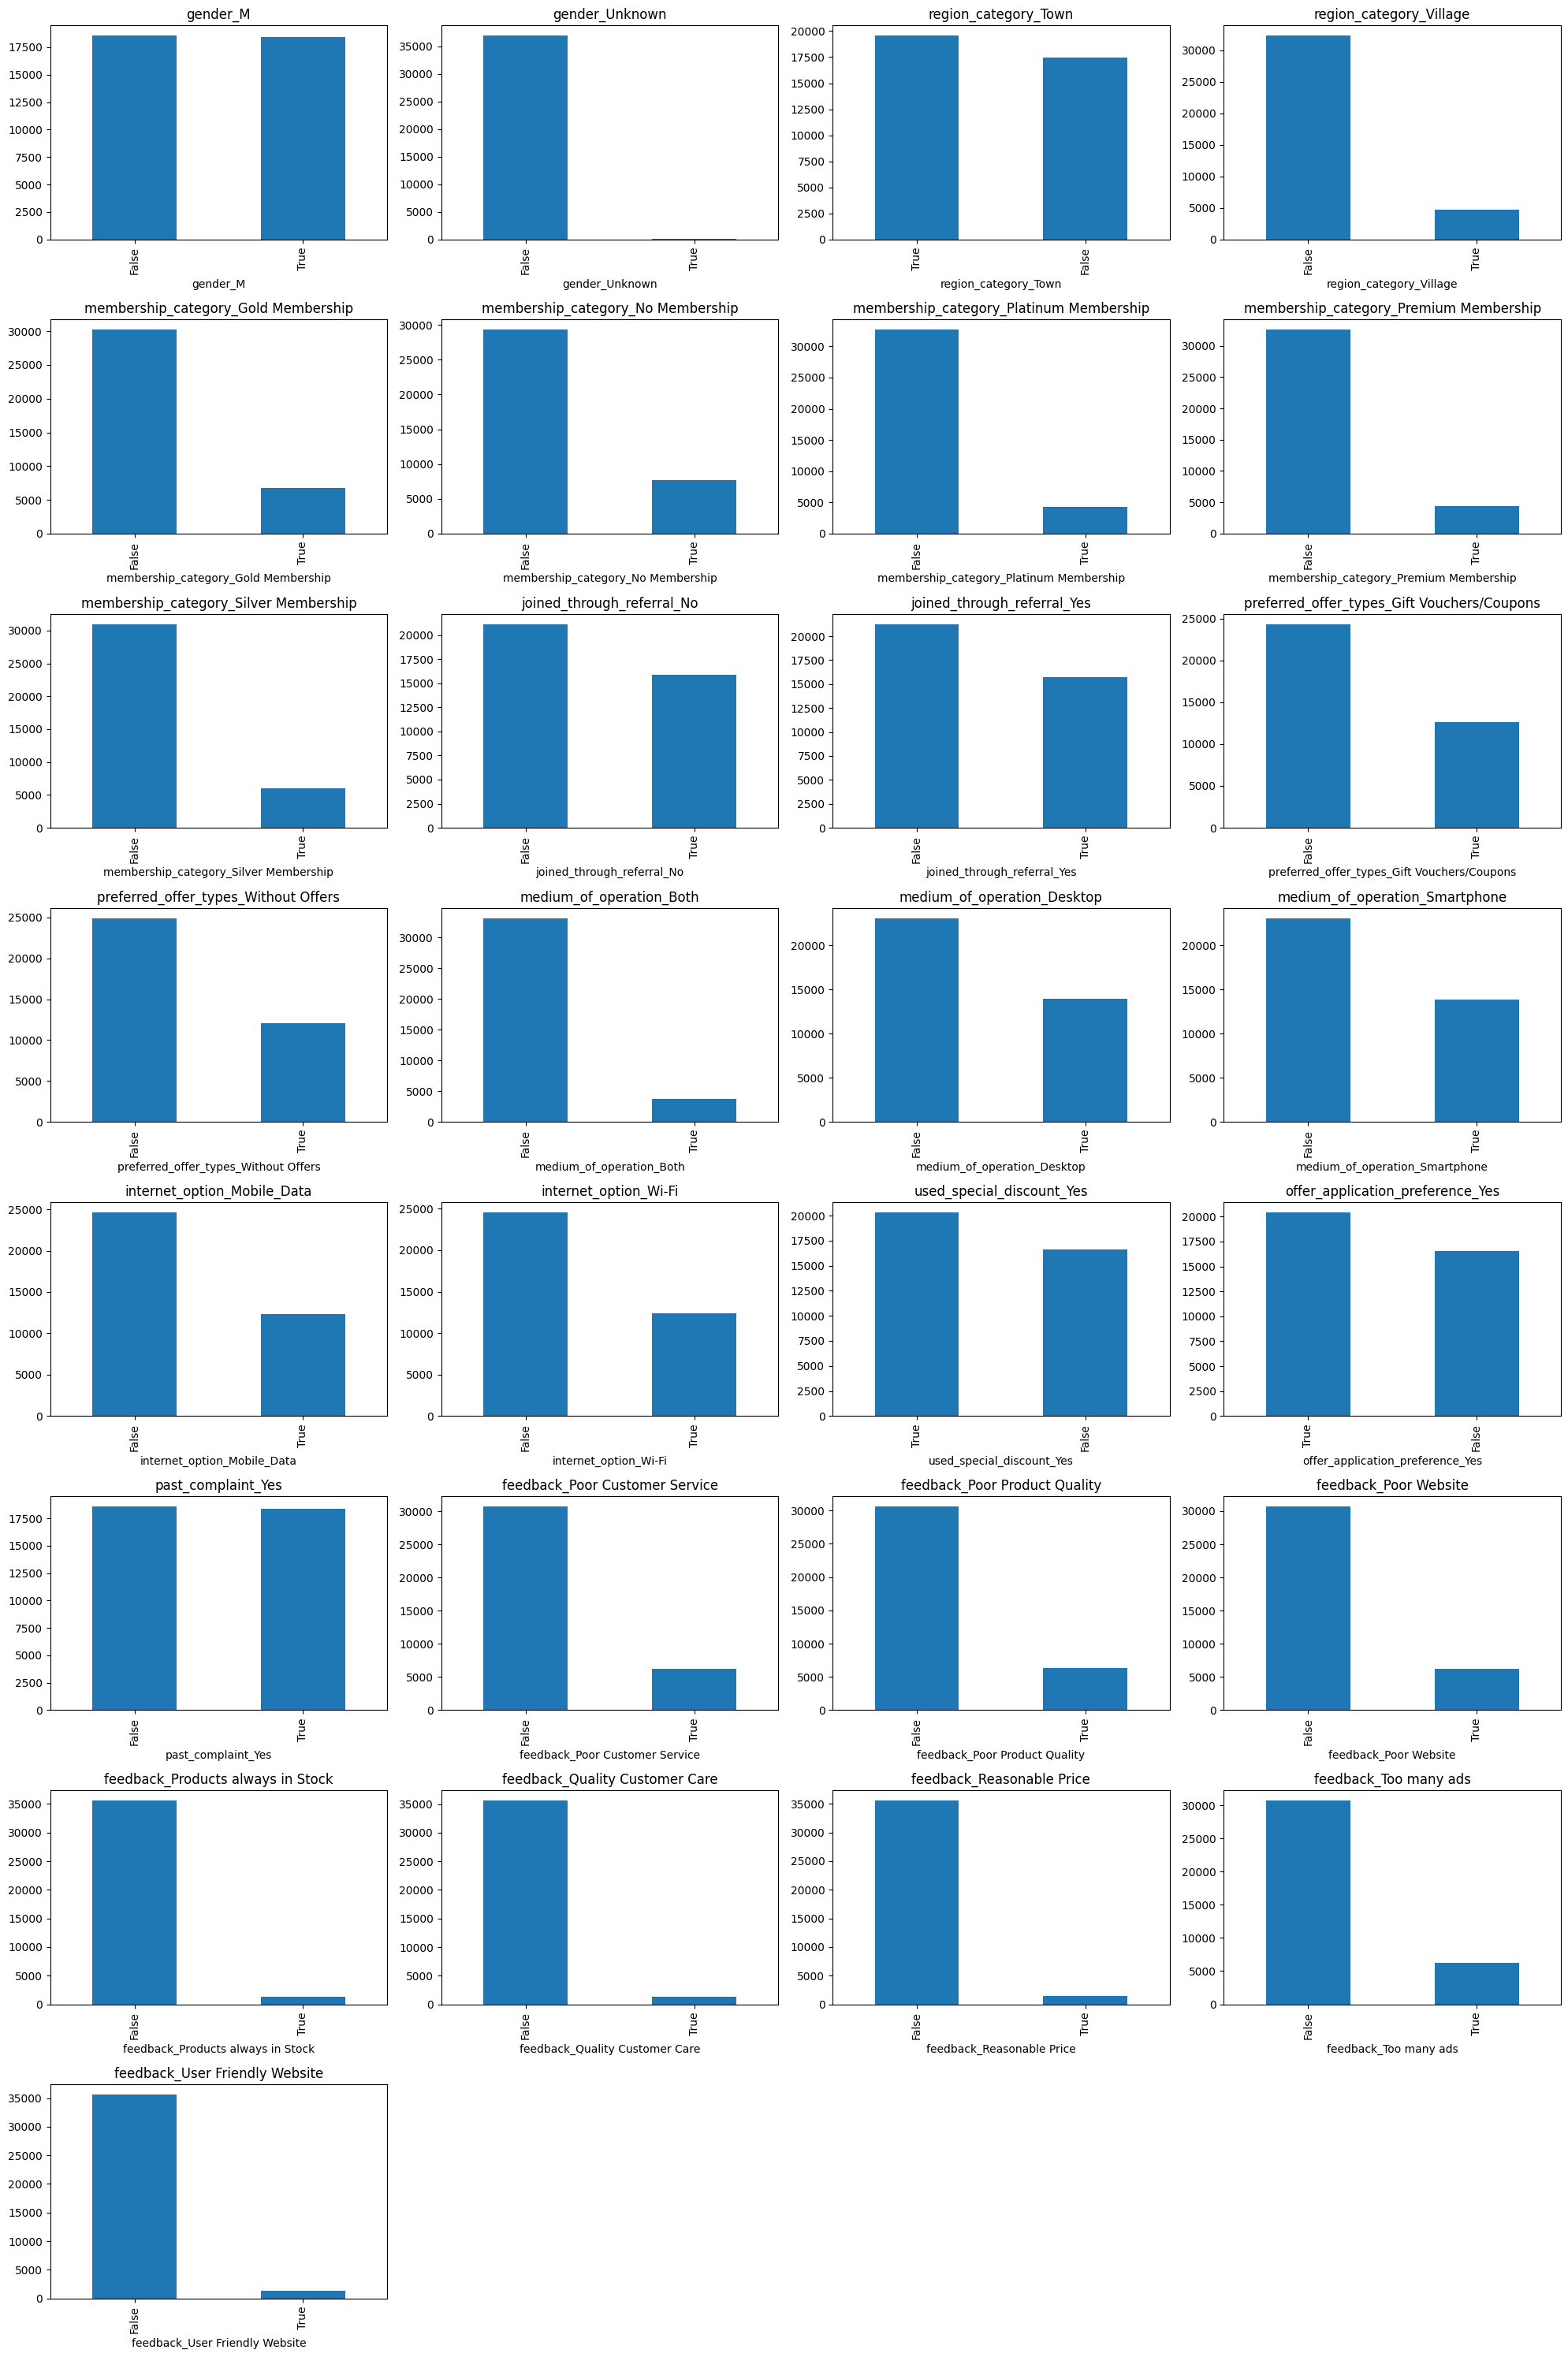

In [271]:
# Selecting some categorical columns to plot
categorical_columns = [
    'gender_M', 'gender_Unknown', 'region_category_Town', 'region_category_Village', 
    'membership_category_Gold Membership', 'membership_category_No Membership',
    'membership_category_Platinum Membership', 'membership_category_Premium Membership',
    'membership_category_Silver Membership', 'joined_through_referral_No', 
    'joined_through_referral_Yes', 'preferred_offer_types_Gift Vouchers/Coupons', 
    'preferred_offer_types_Without Offers', 'medium_of_operation_Both', 
    'medium_of_operation_Desktop', 'medium_of_operation_Smartphone', 
    'internet_option_Mobile_Data', 'internet_option_Wi-Fi', 
    'used_special_discount_Yes', 'offer_application_preference_Yes', 
    'past_complaint_Yes', 'feedback_Poor Customer Service', 'feedback_Poor Product Quality', 
    'feedback_Poor Website', 'feedback_Products always in Stock', 
    'feedback_Quality Customer Care', 'feedback_Reasonable Price', 
    'feedback_Too many ads', 'feedback_User Friendly Website'
]

# Creating subplots for bar charts
plt.figure(figsize=(20, 30))  # Adjust the figure size as needed
plotnumber = 1

for column in categorical_columns:
    ax = plt.subplot(8, 4, plotnumber)  # Change grid size to 8x4
    data_train[column].value_counts().plot(kind='bar', ax=ax)
    plt.title(column)
    plotnumber += 1

plt.tight_layout()
plt.show()


### IMPORT TEST DATASET

In [272]:
tf = pd.read_csv("dataset/test.csv")
tf.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [273]:
# Fill missing values for categorical columns with mode
tf['region_category'] = tf['region_category'].fillna(tf['region_category'].mode()[0])
tf['preferred_offer_types'] = tf['preferred_offer_types'].fillna(tf['preferred_offer_types'].mode()[0])

# Fill missing values for numerical columns with mean
tf['points_in_wallet'] = tf['points_in_wallet'].fillna(tf['points_in_wallet'].mean())

# Drop unnecessary column
tf.drop('complaint_status', axis=1, inplace=True)

# Convert 'joining_date' to day, month, and year
tf["joining_day"] = pd.to_datetime(tf.joining_date, format="%Y-%m-%d").dt.day
tf["joining_month"] = pd.to_datetime(tf.joining_date, format="%Y-%m-%d").dt.month
tf["joining_year"] = pd.to_datetime(tf.joining_date, format="%Y-%m-%d").dt.year

# Drop 'joining_date' column after extracting day, month, and year
tf.drop(["joining_date"], axis=1, inplace=True)

# Extract hour, minutes, and seconds from 'last_visit_time'
tf[['last_visit_time_hour', 'last_visit_time_minutes', 'last_visit_time_seconds']] = tf['last_visit_time'].str.split(':', expand=True).astype(int)

# Drop 'last_visit_time' column after extraction
tf.drop(["last_visit_time"], axis=1, inplace=True)

# Convert categorical columns to dummy/one-hot encoded variables
gender = pd.get_dummies(tf['gender'], drop_first=True)
region = pd.get_dummies(tf['region_category'], drop_first=True)
membership = pd.get_dummies(tf['membership_category'], drop_first=True)
referral = pd.get_dummies(tf['joined_through_referral'], drop_first=True)
offer = pd.get_dummies(tf['preferred_offer_types'], drop_first=True)
medium = pd.get_dummies(tf['medium_of_operation'], drop_first=True)
internet = pd.get_dummies(tf['internet_option'], drop_first=True)
discount = pd.get_dummies(tf['used_special_discount'], drop_first=True)
application = pd.get_dummies(tf['offer_application_preference'], drop_first=True)
complaint = pd.get_dummies(tf['past_complaint'], drop_first=True)
feedback = pd.get_dummies(tf['feedback'], drop_first=True)

# Combine all one-hot encoded columns with the original DataFrame
data_test = pd.concat([tf, gender, region, membership, referral, offer, medium, internet, discount, application, complaint, feedback], axis=1)

# Drop original categorical columns and other unnecessary columns
data_test.drop([
    "customer_id", "Name", "gender", "security_no", "region_category", 
    "membership_category", "joined_through_referral", "referral_id", 
    "preferred_offer_types", "medium_of_operation", "internet_option", 
    "used_special_discount", "offer_application_preference", 
    "past_complaint", "feedback", "avg_frequency_login_days"
], axis=1, inplace=True)

# Display the first few rows of the preprocessed data
data_test.head()


,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,...,Yes,Yes,Poor Customer Service,Poor Product Quality,Poor Website,Products always in Stock,Quality Customer Care,Reasonable Price,Too many ads,User Friendly Website
0,50,12,386.26,40721.44,733.830000,2,11,2015,7,19,...,False,False,False,True,False,False,False,False,False,False
1,41,11,37.80,9644.40,726.000000,1,3,2016,22,21,...,False,False,False,False,True,False,False,False,False,False
2,31,18,215.36,3693.25,713.780000,3,3,2017,16,40,...,False,True,False,False,False,False,False,False,False,False
3,64,-999,44.57,36809.56,744.970000,18,8,2017,14,56,...,False,True,False,False,False,False,False,False,True,False
4,16,6,349.88,40675.86,299.048351,5,5,2015,2,57,...,True,True,False,False,True,False,False,False,False,False


In [274]:
data_test.shape

(19919, 40)

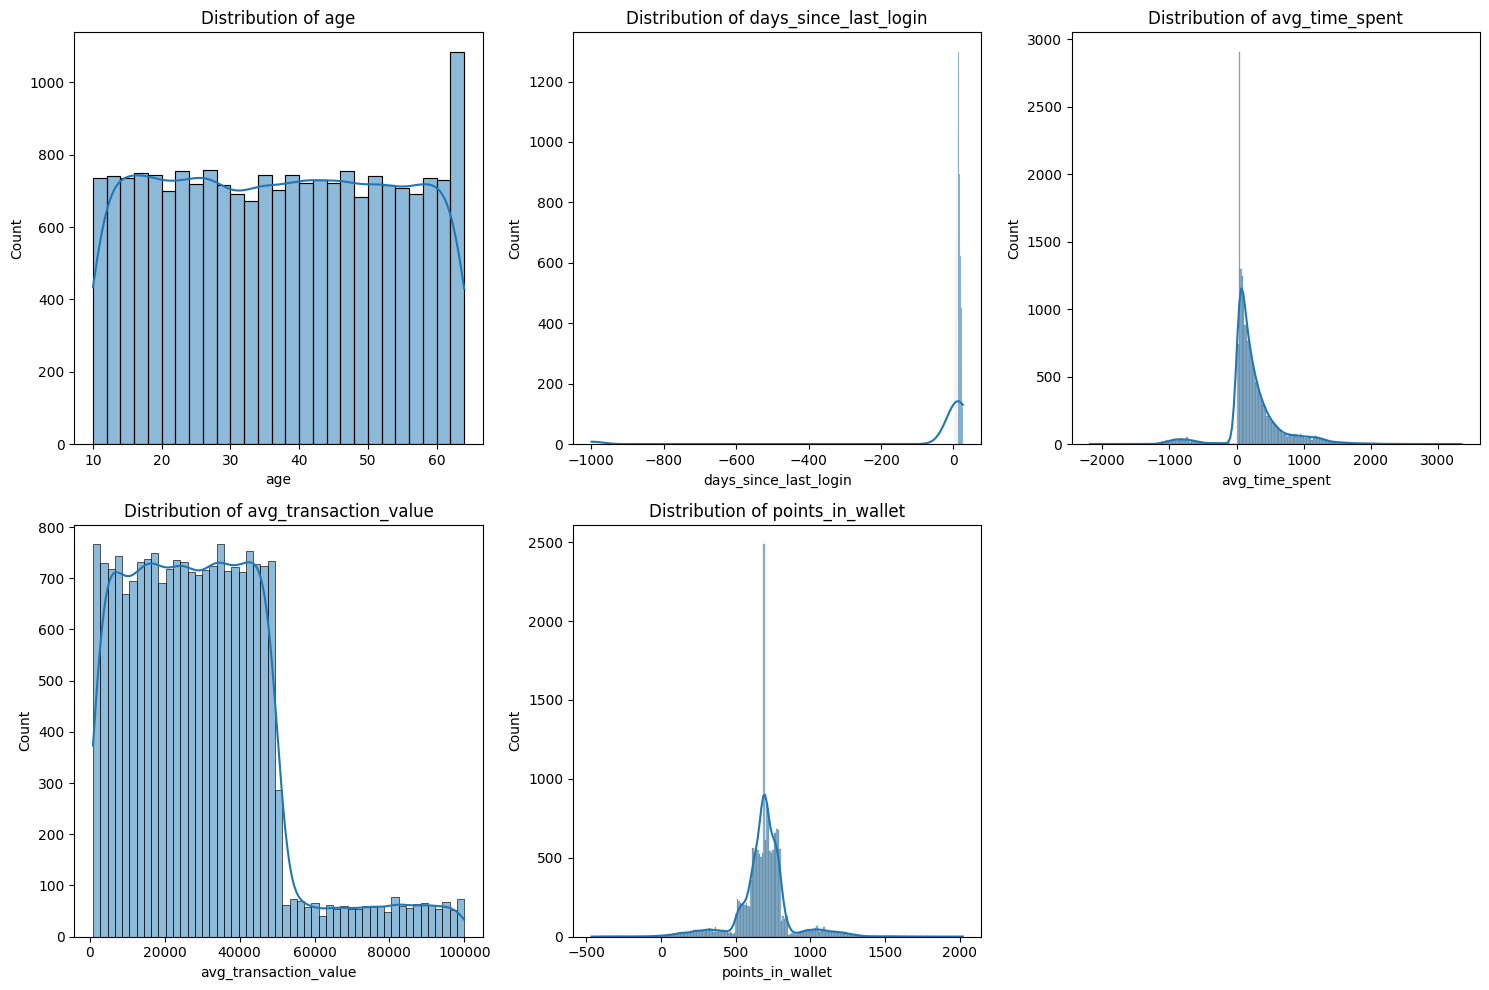

In [275]:
numeric_features = ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data_test[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. heatmap
2. feature_importance_
3. SelectKBest

In [279]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,2,17,8,2017,16,...,True,False,False,False,False,True,False,False,False,False
1,32,16,306.34,12838.38,686.882199,1,28,8,2017,12,...,False,True,False,False,False,False,True,False,False,False
2,44,14,516.16,21027.00,500.690000,5,11,11,2016,22,...,True,True,False,False,True,False,False,False,False,False
3,37,11,53.27,25239.56,567.660000,5,29,10,2016,15,...,True,True,False,False,True,False,False,False,False,False
4,31,20,113.13,24483.66,663.060000,5,12,9,2017,15,...,True,True,False,False,True,False,False,False,False,False


In [280]:
data_train.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet', 'churn_risk_score',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
  

#### FEATURES COLUMNS

In [281]:
x = data_train.loc[:, ['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
       'past_complaint_Yes', 'feedback_Poor Customer Service',
       'feedback_Poor Product Quality', 'feedback_Poor Website',
       'feedback_Products always in Stock', 'feedback_Quality Customer Care',
       'feedback_Reasonable Price', 'feedback_Too many ads',
       'feedback_User Friendly Website']]

In [282]:
x.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,17,8,2017,16,8,...,True,False,False,False,False,True,False,False,False,False
1,32,16,306.34,12838.38,686.882199,28,8,2017,12,38,...,False,True,False,False,False,False,True,False,False,False
2,44,14,516.16,21027.00,500.690000,11,11,2016,22,53,...,True,True,False,False,True,False,False,False,False,False
3,37,11,53.27,25239.56,567.660000,29,10,2016,15,57,...,True,True,False,False,True,False,False,False,False,False
4,31,20,113.13,24483.66,663.060000,12,9,2017,15,46,...,True,True,False,False,True,False,False,False,False,False


#### TARGET COLUMN

In [283]:
y= data_train[['churn_risk_score']]

In [284]:
y.head()

,churn_risk_score
0,2
1,1
2,5
3,5
4,5


In [286]:
# important feature using extratreeregressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

c:\Users\TEST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor()

In [287]:
print(selection.feature_importances_)

[0.0241     0.02082476 0.02511749 0.07937129 0.07033013 0.02375849
 0.02307103 0.01388939 0.02373577 0.02358377 0.02485163 0.01013875
 0.00032037 0.01107206 0.00739245 0.03041007 0.13312581 0.0377858
 0.03119188 0.05483616 0.00861646 0.00893168 0.0100079  0.00934367
 0.00616262 0.00808374 0.00828686 0.00888243 0.00980047 0.00804617
 0.00667861 0.01157223 0.00837272 0.00825093 0.0071219  0.04971856
 0.05241746 0.04621358 0.00759799 0.04698688]


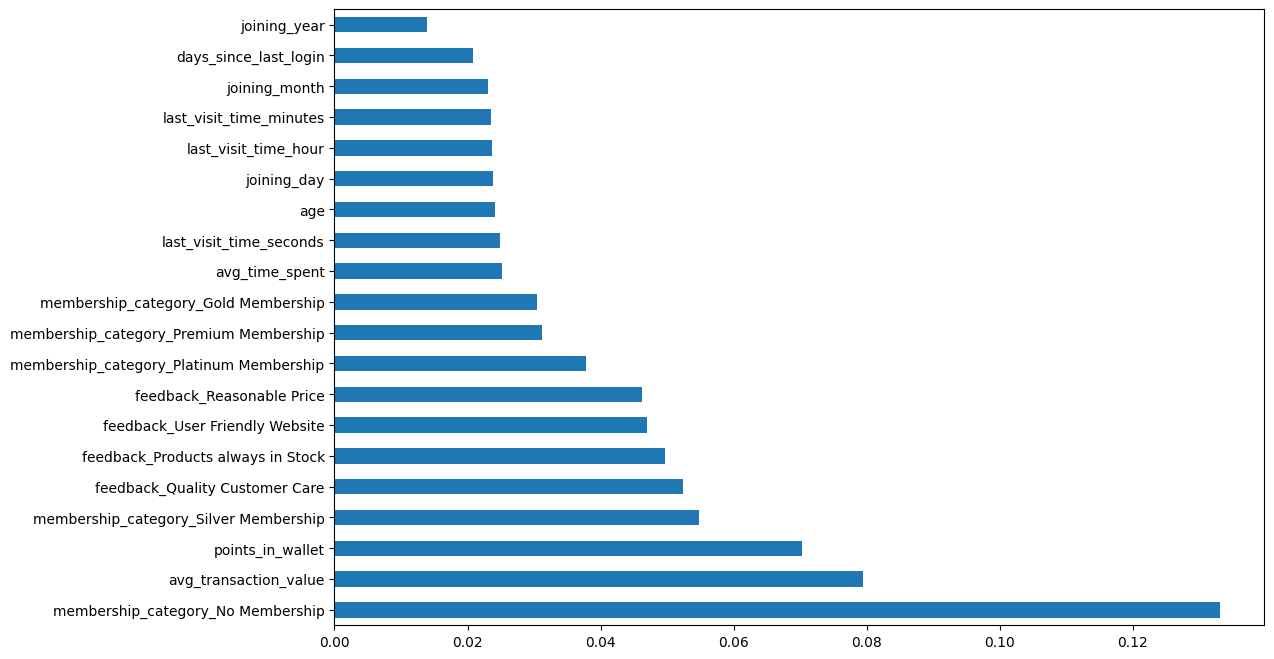

In [288]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## MODEL TRAINING

                                      Specs        Score
16        membership_category_No Membership  2009.019268
37                feedback_Reasonable Price  1701.178078
3                     avg_transaction_value  1688.243117
35        feedback_Products always in Stock  1615.428524
39           feedback_User Friendly Website  1596.381639
36           feedback_Quality Customer Care  1555.454915
18   membership_category_Premium Membership  1234.810937
17  membership_category_Platinum Membership  1198.678370
4                          points_in_wallet   662.477006
19    membership_category_Silver Membership   651.101980


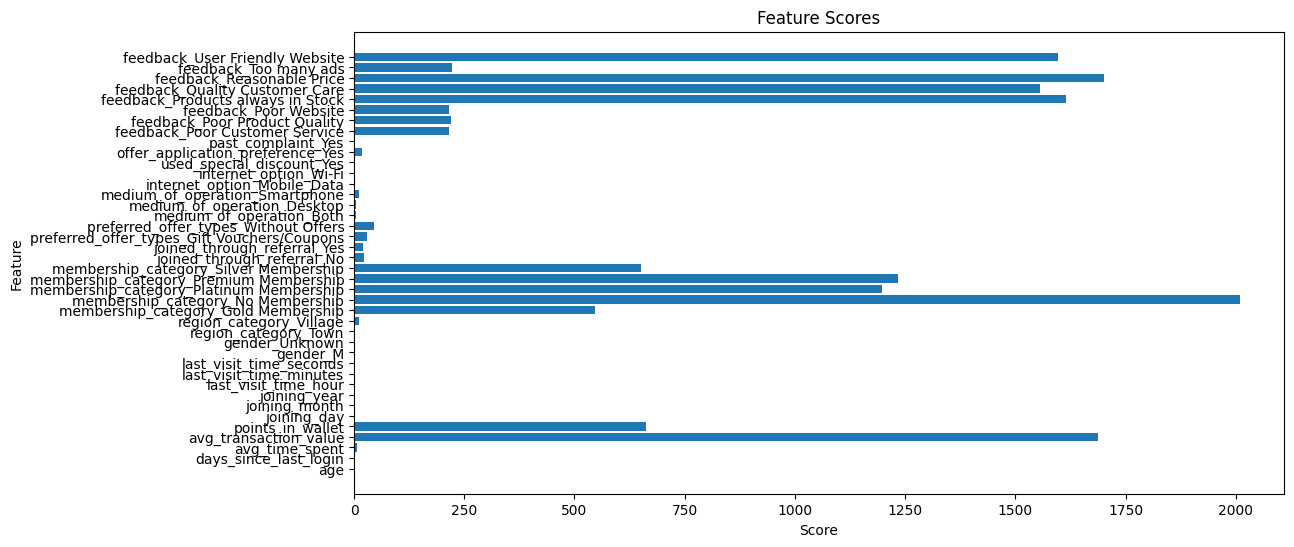

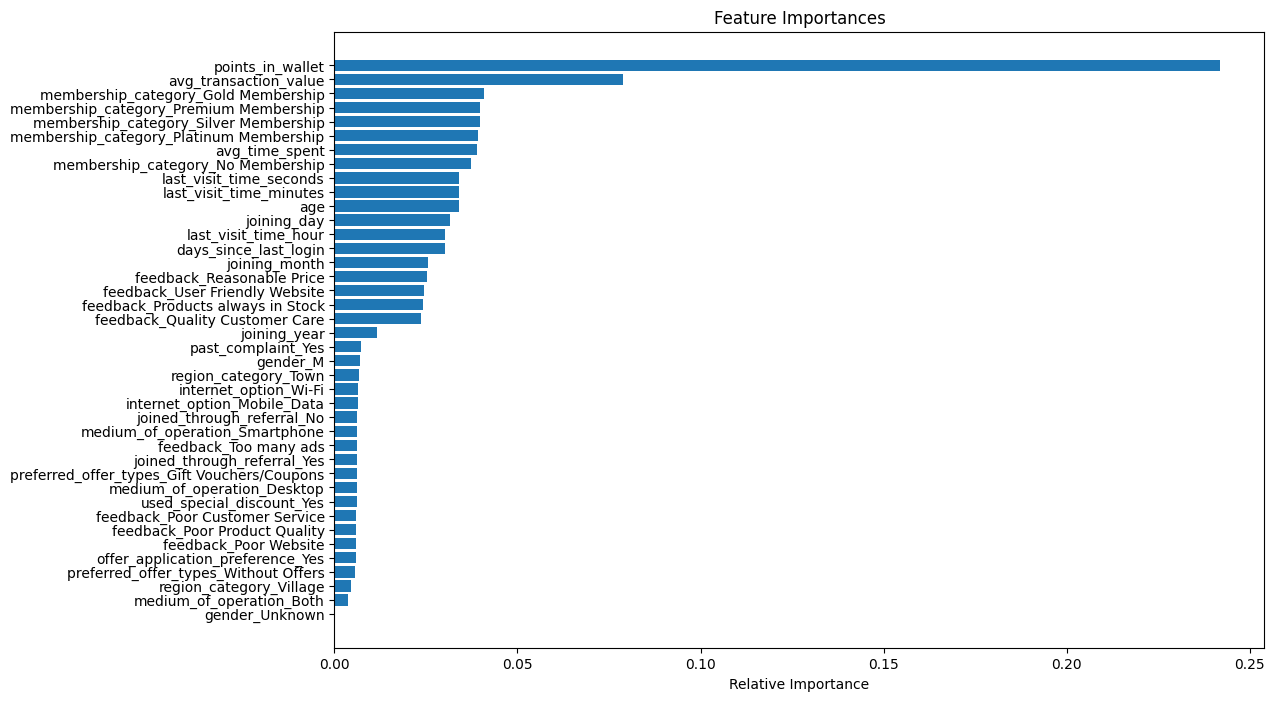

In [289]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features and Target
X = data_train.drop('churn_risk_score', axis=1)
y = data_train['churn_risk_score']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select K Best features based on ANOVA F-value between label/feature
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X_train, y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # Naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))  # Print the 10 best features

# Plotting Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(featureScores['Specs'], featureScores['Score'])
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Scores')
plt.show()

# Alternatively, use Random Forest for feature importance
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Plotting Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [291]:
# Train a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on Test Set
y_pred = rf_model.predict(X_test)


In [295]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred)*100)                              

Accuracy: 74.87498310582511


In [296]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[   0   24   11   75   53   73]
 [   0  388  118    0    0    0]
 [   0  143  405    0    0    0]
 [   0    0    0 1849  238    0]
 [   0    0    0  172 1134  714]
 [   0    0    0    4  234 1764]]


In [297]:
print("Classification Report:\n", classification_report(y_test, y_pred)) 

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       236
           1       0.70      0.77      0.73       506
           2       0.76      0.74      0.75       548
           3       0.88      0.89      0.88      2087
           4       0.68      0.56      0.62      2020
           5       0.69      0.88      0.77      2002

    accuracy                           0.75      7399
   macro avg       0.62      0.64      0.63      7399
weighted avg       0.73      0.75      0.73      7399



c:\Users\TEST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TEST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TEST\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [303]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Build a neural network model with more layers, dropout, and LeakyReLU
nn_model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),  # Drop 50% of the units
    
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    
    Dense(32),
    LeakyReLU(alpha=0.1),
    
    Dense(1, activation='sigmoid')
])

# Compile the model with RMSprop optimizer
nn_model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Use EarlyStopping to prevent overfitting and save the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

c:\Users\TEST\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\TEST\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0708 - loss: -260659616.0000 - val_accuracy: 0.0684 - val_loss: -5001781248.0000
Epoch 2/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0730 - loss: -12877593600.0000 - val_accuracy: 0.0684 - val_loss: -61634981888.0000
Epoch 3/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.0716 - loss: -100481138688.0000 - val_accuracy: 0.0684 - val_loss: -282032439296.0000
Epoch 4/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.0698 - loss: -392667070464.0000 - val_accuracy: 0.0684 - val_loss: -844170199040.0000
Epoch 5/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0726 - loss: -1081633210368.0000 - val_accuracy: 0.0684 - val_loss: -1990740017152.0000
Epoch 6/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0755 - loss: -2413887225856.0000 - val_accuracy: 0.0684 - val_loss: -4032890404864.0000
Epoch 7/50
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0739 - loss: -47541623193

In [304]:

# Evaluate the model
accuracy = nn_model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Neural Network Accuracy: {accuracy * 100}%")

Neural Network Accuracy: 6.838762015104294%
